# Cleaning & Preprocessing

In this notebook, I perform some more cleaning and preprocessing of the dataset. More specifically, I perform the following steps:
- remove columns that are unnecessary 
- remove rows that are unrelated to LGBTQI+ 
- create column 'zittingsperiode'
- split the 'text' value into question and answer 


In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [3]:
df = pd.read_csv('questions_MP.csv', encoding='cp437')

In [8]:
# visualization setting
sns.set(style="whitegrid")

## Remove unnecessary columns

In [10]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_fact                      506 non-null    int64  
 1   zittingsjaar                 506 non-null    object 
 2   naam_vragensteller           506 non-null    object 
 3   voornaam_vragensteller       506 non-null    object 
 4   id_vragensteller             506 non-null    int64  
 5   bevraagde_minister_naam      506 non-null    object 
 6   bevraagde_minister_voornaam  506 non-null    object 
 7   bevraagde_minister_id        506 non-null    int64  
 8   publicatiedatum              506 non-null    object 
 9   text                         506 non-null    object 
 10  thema_2                      0 non-null      float64
 11  thema_3                      0 non-null      float64
 12  thema_4                      0 non-null      float64
 13  thema_5             

The variables 'thema_2' up to 'thema_6' only contain missing values, so these will be deleted.

In [14]:
df.drop(['thema_2', 'thema_3', 'thema_4', 'thema_5', 'thema_6'], axis=1, inplace=True)

## Create column 'zittingsperiode'

In [16]:
# group by 'zittingsjaar' and count the occurrences
yearly_distribution = df['zittingsjaar'].value_counts().sort_index()
print(yearly_distribution)

zittingsjaar
1995-1996    11
1996-1997     8
1997-1998     1
1998-1999     4
1999-2000     8
2000-2001     5
2001-2002     3
2002-2003     4
2003-2004     1
2004-2005     5
2005-2006    15
2006-2007     6
2007-2008    16
2008-2009     9
2009          1
2009-2010    16
2010-2011    10
2011-2012    29
2012-2013    28
2013-2014    11
2014          1
2014-2015    41
2015-2016    38
2016-2017    36
2017-2018    17
2018-2019    15
2019          1
2019-2020    42
2020-2021    44
2021-2022    52
2022-2023    25
2023-2024     2
BZ 1995       1
Name: count, dtype: int64


C:\Users\yasem\AppData\Local\Temp\ipykernel_5140\3062637072.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_distribution.index, y=yearly_distribution.values, palette='viridis')


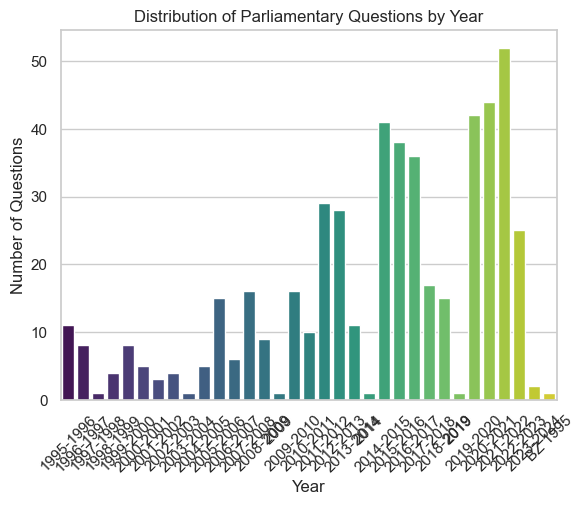

In [17]:
sns.barplot(x=yearly_distribution.index, y=yearly_distribution.values, palette='viridis')

# Customize the plot
plt.title('Distribution of Parliamentary Questions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

In [22]:
# create a variable 'zittingsperiode' 
def map_zittingsperiode(zittingsjaar):
    # Define the mapping based on the given ranges
    if zittingsjaar in ['BZ 1995', '1995-1996', '1996-1997', '1997-1998', '1998-1999']:
        return '1995-1999'
    elif zittingsjaar in ['1999-2000', '2000-2001', '2001-2002', '2002-2003', '2003-2004']:
        return '1999-2004'
    elif zittingsjaar in ['2004-2005', '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009']:
        return '2004-2009'
    elif zittingsjaar in ['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014']:
        return '2009-2014'
    elif zittingsjaar in ['2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019']:
        return '2014-2019'
    elif zittingsjaar in ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']:
        return '2019-2024'
    else:
        return 'Unknown'

# Apply the function to create the new column
df['zittingsperiode'] = df['zittingsjaar'].apply(map_zittingsperiode)

In [ ]:
df.head(5)

In [24]:
# group by 'zittingsperiode' and count the occurrences
zittingsperiode_distribution = df['zittingsperiode'].value_counts().sort_index()
print(zittingsperiode_distribution)

zittingsperiode
1995-1999     25
1999-2004     21
2004-2009     52
2009-2014     95
2014-2019    148
2019-2024    165
Name: count, dtype: int64


C:\Users\yasem\AppData\Local\Temp\ipykernel_5140\3683571364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zittingsperiode_distribution.index, y=zittingsperiode_distribution.values, palette='viridis')


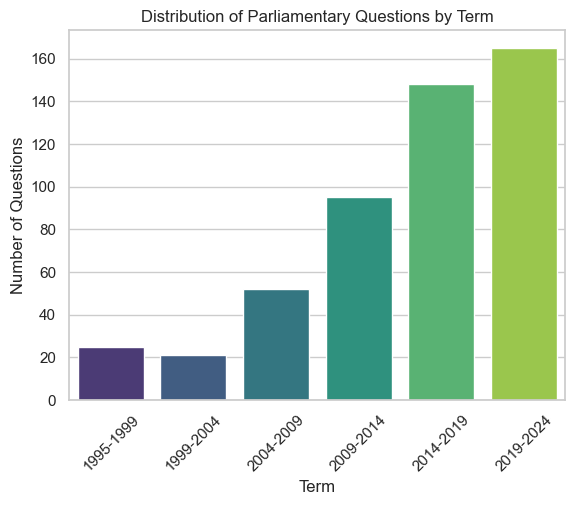

In [25]:
sns.barplot(x=zittingsperiode_distribution.index, y=zittingsperiode_distribution.values, palette='viridis')

# Customize the plot
plt.title('Distribution of Parliamentary Questions by Term')
plt.xlabel('Term')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

## Discovering how to split the 'text' value into question and answer

In [27]:
# counting the amount of times 'antwoord' is in the text value to see if we can split it that way
def count_antwoord(text):
    return len(re.findall(r'\bantwoord\b', text, re.IGNORECASE))

# create 'antwoord_count' column
df['antwoord_count'] = df['text'].apply(count_antwoord)

In [28]:
# distribution of antwoord_count
df['antwoord_count'].describe()

count    506.000000
mean       1.314229
std        4.069456
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       90.000000
Name: antwoord_count, dtype: float64

It seems like simply splitting based on 'antwoord' is not a good way, since many texts contain more than one time the word 'antwoord'. 

In [31]:
# count instances where antwoord_count > 1
count_higher_than_1 = (df['antwoord_count'] > 1).sum()
count_higher_than_1

142

142 questions contain more than once 'antwoord' in their text, so I can't simply split there.

In [32]:
# check instances where antwoord_count is greater than 1
instances_with_higher_count = df[df['antwoord_count'] > 1]
print(instances_with_higher_count[['id_fact', 'antwoord_count']])

     id_fact  antwoord_count
21    456603               3
22    456602               4
24    457103               2
29    458291               2
30    459686               2
..       ...             ...
495  1734138               2
496  1734108               3
497  1727930               2
499  1722565               6
500  1725052               2

[142 rows x 2 columns]


I will now manually go through some of these instances and check what other ways I can split the text.

In [38]:
# checking out the text value of some of these instances
row = df[df['id_fact'] == 456603]
print(row['text'].values[0])

Vraag nr. 19 gesteund. Er is geen onderscheid in behandeling van 3 november 1998 tussen deze projecten en de overige activiteiten op van de heer FILIP DEWINTER het vlak van de aidspreventie. Holebi's ΓÇô Gezondheidsbeleid Binnen het departement Welzijn, Volksgezondheid en Cultuur is evenwel een werkgroep GelijkekanOp 7 oktober 1998 hield Vlaams minister van senbeleid actief waarbij ook medewerkers van de Gelijkekansenbeleid Brigitte Grouwels een toeadministratie Gezondheidszorg betrokken zijn. spraak op het congres van de Federatie WerkgroeE├⌐n van de doelgroepen hier zijn de holebi's. pen Homoseksualiteit (FWH). Hier verklaarde zij dat positieve beeldvorming, informatie en sensibili(Antwoord Brigitte Grouwels : blz. 911 ; antwoord sering essentieel zijn in haar beleid. Zij kondigde Luc Martens : Bulletin van Vragen en Antwoorden een sensibiliseringscampagne aan en pleitte voor nr. 5 van 18 december 1998, blz. 819 ΓÇô red.) een categoriale hulpverlening in de gezondheidsen welzijnszorg

In [39]:
row = df[df['id_fact'] == 456602]
print(row['text'].values[0])

Vraag nr. 10 Antwoord van 3 november 1998 van de heer FILIP DEWINTER 1. Er zal een serene mediacampagne worden gevoerd, gericht aan alle ouders. Via deze Holebi's ΓÇô Gelijkekansenbeleid mediacampagne zal een ruim publiek worden bereikt en kunnen we aan een mentaliteitswijziOp 7 oktober 1998 hield de minister een toespraak ging voor meer openheid en een grotere aanop het congres van de Federatie Werkgroepen vaarding van homoseksualiteit werken. Deze Homoseksualiteit (FWH). Hier verklaarde zij dat wijziging zal het thema ouders en homoseksupositieve beeldvorming, informatie en sensibilisealiteit ruimer bespreekbaar maken. ring essentieel zijn in haar beleid. Zij kondigde een sensibiliseringscampagne aan en pleitte voor een De sensibiliseringscampagne bevindt zich nog categoriale hulpverlening in de gezondheidsen steeds in de conceptfase. Er zijn nog geen besliswelzijnszorg voor holebi's (homo's, lesbiennes en singen over de kanalen en de media die zullen biseksuelen). worden gebruikt. N

In [40]:
row = df[df['id_fact'] == 457103]
print(row['text'].values[0])

Vraag nr. 23 Antwoord van 19 februari 1999 van de heer FILIP DEWINTER Het geheel van de tentoonstelling wil een beeld geven van de diversiteit onder lesbische vrouwen. Lesbian ConneXion/s ΓÇô Subsidi├½ring De tentoonstelling laat iets zien van de leefstijl van lesbiennes, van hun dagelijks leven, hoe ze uitgaan Ik kwam in het bezit van een brief van Lesbian of aan sport doen, ... ConneXion/s van 12 december 1998 (zie bijlage). In dit schrijven stelt deze vereniging zich als volgt Het doel van dit project is aan te tonen dat maatvoor : Lesbian ConneXion/s is een internationaal schappelijke discriminatie ervoor zorgt dat lesbienreizende fototentoonstelling met als thema lesbines in onze samenleving niet zichtbaar zijn. Velen sche levens, leefstijlen en zichtbaarheid. Het geheel willen en/of durven niet zichtbaar zijn, waardoor wil een beeld geven van de diversiteit onder lesbihet weer gemakkelijker wordt om de discriminatie sche vrouwen. De tentoonstelling laat iets zien van van lesbienn

In [41]:
row = df[df['id_fact'] == 458291]
print(row['text'].values[0])

Vraag nr. 71 van 21 januari 2000 van de heer FILIP DEWINTER Educatieve werkmap holebi's ΓÇô Uitgangspunten Zie : Vlaams minister van Onderwijs en Vorming Vraag nr. 49 van 21 januari 2000 van de heer Filip Dewinter Blz. 816 Antwoord Een geco├╢rdineerd antwoord zal worden verstrekt door mevrouw Marleen Vanderpoorten, Vlaams minister van Onderwijs en Vorming.


In [43]:
row = df[df['id_fact'] == 1722565]
print(row['text'].values[0])

SCHRIFTELIJKE VRAAG nr. 246 van NADIA SMINATE datum: 27 maart 2023 aan BART SOMERS VICEMINISTER-PRESIDENT VAN DE VLAAMSE REGERING, VLAAMS MINISTER VAN BINNENLANDS BESTUUR, BESTUURSZAKEN, INBURGERING EN GELIJKE KANSEN Vlaamse overheid Invulling neutraliteitsprincipe (2) Ik verwijs graag naar mijn eerdere schriftelijke vraag nr. 183 van 9 februari 2023. Bij gebrek aan een duidelijk antwoord op mijn zeer concrete vragen wens ik graag opnieuw volgende elementen te bevragen. Op dit ogenblik moet inzake neutraliteit rekening worden gehouden met de huidige deontologische code voor de personeelsleden van de Vlaamse overheid (Omzendbrief BZ 2011/6 van 6 juli 2011). De huidige deontologische code bepaalt over neutraliteit het volgende: ΓÇ£Het gelijkheidsbeginsel vormt een centraal element in de opdracht van de Vlaamse administratie: klanten en leveranciers hebben het recht om in gelijke gevallen op dezelfde manier te worden behandeld. Daarom moeten personeelsleden op ieder moment hun objectivite

It seems like some questions contain 'ANTWOORD' to indicate the start of the answer, whereas other questions contain the word 'Antwoord' that indicates the start of the answer. These are distinct from the word 'antwoord' which could be mentioned in the text as part of the written question. Let's check it out.

In [46]:
# counting how many times ANTWOORD or Antwoord occurs in the text value
def count_antwoord_antwoord(text):
    matches = re.findall(r'\b(?:ANTWOORD|Antwoord)\b', text)
    return len(matches)

# new variable 'Antwoord_ANTWOORD_count'
df['Antwoord_ANTWOORD_count'] = df['text'].apply(count_antwoord_antwoord)
print(df[['id_fact', 'text', 'Antwoord_ANTWOORD_count']].head())

   id_fact                                               text  \
0   449734  Vraag nr. 22 van 4 september 1995 van de heer ...   
1   450728  Vraag nr. 136 vrouwen KUL van 2 april 1996 Cul...   
2   450737  Vraag nr. 155 vrouwen KUL van 2 april 1996 Cul...   
3   450739  Vraag nr. 38 vrouwen KUL van 2 april 1996 Cult...   
4   450741  Vraag nr. 110 vrouwen KUL van 2 april 1996 Cul...   

   Antwoord_ANTWOORD_count  
0                        1  
1                        0  
2                        0  
3                        0  
4                        0  


If this count is exactly 1, for those instances I can simply split it at ANTWOORD or Antwoord. If this count is 0, I need to figure out which other word or phrase I can use to split the text. If this count is greater than 1, I need to check and find another way as well.

In [47]:
# count instances where Antwoord_ANTWOORD_count > 1 or equal to 0
count_greater_than_1 = (df['Antwoord_ANTWOORD_count'] > 1).sum()
count_equal_to_0 = (df['Antwoord_ANTWOORD_count'] == 0).sum()

print(f'Number of instances with Antwoord_ANTWOORD_count > 1: {count_greater_than_1}')
print(f'Number of instances with Antwoord_ANTWOORD_count == 0: {count_equal_to_0}')


Number of instances with Antwoord_ANTWOORD_count > 1: 3
Number of instances with Antwoord_ANTWOORD_count == 0: 157


There are only 3 instances with an occurrence of greater than 1, which means I can just take a look at those 3 texts and manually split the texts. However, there are 157 instances with an occurrence count of 0, which means I cannot just use Antwoord or ANTWOORD. I need to check how else I can split those texts, since I cannot do it manually for such a higher number of texts.

To check this out, I need the id_fact values so I can look at their 'text' value. 

In [48]:
# find instances where Antwoord_ANTWOORD_count is > 1 or equal to 0
instances_greater_than_1 = df[df['Antwoord_ANTWOORD_count'] > 1]
instances_equal_to_0 = df[df['Antwoord_ANTWOORD_count'] == 0]

print('\nInstances with Antwoord_ANTWOORD_count > 1:')
print(instances_greater_than_1[['id_fact', 'Antwoord_ANTWOORD_count']])

print('\nInstances with Antwoord_ANTWOORD_count == 0:')
print(instances_equal_to_0[['id_fact', 'Antwoord_ANTWOORD_count']])



Instances with Antwoord_ANTWOORD_count > 1:
    id_fact  Antwoord_ANTWOORD_count
21   456603                        2
22   456602                        2
49   467363                       43

Instances with Antwoord_ANTWOORD_count == 0:
     id_fact  Antwoord_ANTWOORD_count
1     450728                        0
2     450737                        0
3     450739                        0
4     450741                        0
5     450731                        0
..       ...                      ...
187   883756                        0
188   920554                        0
189   912086                        0
190   909119                        0
191   907464                        0

[157 rows x 2 columns]


For these instances, I will manually look at some and try to figure out how to split the texts.

In [52]:
row = df[df['id_fact'] == 450728]
print(row['text'].values[0])

Vraag nr. 136 vrouwen KUL van 2 april 1996 Cultuurverandering en etDepartement Sociale en van mevrouw RIET VAN CLEUVENBERGEN niciteit bij Turkse jonge Culturele Antropologie ΓÇô vrouwen in Brussel en KUL Gelijke-kansenbeleid mannen/vrouwen ΓÇô Evaluatie Emirdag (Turkije) In 1993 besliste de Vlaamse regering een beleid van Vrouwen en beslissingen Afdeling Fundamentele en gelijke kansen voor mannen en vrouwen te voeren. Comparatieve Pedagogie ΓÇô KUL 1. Welke onderzoeksprojecten of acties werden door diensten die onder de bevoegdheid van de ministerOnderzoeksnetwerk naar Welzijnsplanning ΓÇô Deparpresident vallen, in het kader van deze beleidsopties vrouwelijke arbeidskrachtement Politieke en Soten ciale Wetenschappen ΓÇô op het getouw gezet ? UIA 2. Hoe werden deze onderzoeksprojecten ge├½valueerd De participatie van vrouDepartement Derde Ween opgevolgd ? wen in de nationale ontwikreld ΓÇô Ufsia 3. Is er zichtbaar resultaat geboekt (bijvoorbeeld keling ΓÇô la participation des meer vrou

In [50]:
# This row will be deleted since it is the Bulletin of questions and answers (88 pages of text)
df.drop(df[df['id_fact'] == 467363].index, inplace=True)

In [54]:
df = pd.DataFrame(df)

In [57]:
# quickly checking out the columns again
print(df.columns)

Index(['id_fact', 'zittingsjaar', 'naam_vragensteller',
       'voornaam_vragensteller', 'id_vragensteller', 'bevraagde_minister_naam',
       'bevraagde_minister_voornaam', 'bevraagde_minister_id',
       'publicatiedatum', 'text', 'title', 'thema_1', 'voornaam', 'achternaam',
       'geslacht', 'geboortedatum', 'party_id', 'party_naam',
       'zittingsperiode', 'antwoord_count', 'Antwoord_ANTWOORD_count'],
      dtype='object')


In [58]:
# new variable 'check' based on some conditions
df['check'] = df.apply(lambda row: 1 if row['Antwoord_ANTWOORD_count'] == 1 else (1 if row['antwoord_count'] == 1 else 0), axis=1)


In [60]:
# check the unique values and their distribution for 'check' variable
check_counts = df['check'].value_counts()
check_counts

check
1    374
0    131
Name: count, dtype: int64

This basically means that there are 374 texts that I can split based on 'ANTWOORD', 'Antwoord' or 'antwoord', but 131 texts that I cannot split like that. 

I will now check from which terms those 131 questions come from. Maybe there is some relationship there and are the older questions differently documented.  

In [62]:
# checking out if the term period (zittingsperiode) has something to do with those 131 texts
zittingsperiode_check_0 = df.loc[df['check'] == 0, 'zittingsperiode']
unique_zittingsperiode = zittingsperiode_check_0.value_counts()
print("Unique values and their counts for 'zittingsperiode' where check = 0:")
print(unique_zittingsperiode)

Unique values and their counts for 'zittingsperiode' where check = 0:
zittingsperiode
2009-2014    82
2004-2009    43
1995-1999     4
1999-2004     2
Name: count, dtype: int64


In [65]:
# look at rows where 'check' = 0 and zittingsperiode = 2004-2009 or 2009-2014
id_fact_check_0 = df.loc[(df['check'] == 0) & (df['zittingsperiode'].isin(['2004-2009', '2009-2014'])), 'id_fact']

In [66]:
id_fact_check_0

51     422646
52     479273
53     477322
54     477152
55     477151
        ...  
186    888580
187    883756
188    920554
189    912086
191    907464
Name: id_fact, Length: 125, dtype: int64

Again, manually checking the texts from these instances to see what's going on.

In [69]:
row = df[df['id_fact'] == 907464]
print(row['text'].values[0])

  vlaams parlement  ? SCHRIFTELIJKE VRAGEN      pascal smet  vlaams minister van onderwijs, jeugd, gelijke kansen en brussel      Vraag nr. 237  van 7 januari 2014  van ann brusseel        Verticaal gelijkekansenbeleid   -   Subsidies    Het verticaal  gelijkekansenbeleid  werkt  rond  de  beleidsthema's  gender,  mensen met een handicap, seksuele identiteit, integrale toegankelijkheid  en  etnisch-culturele diversiteit.    De begroting laat echter niet toe om na  te  gaan  hoeveel  middelen  worden  besteed per  thema  aangezien  heel  wat  basisallocaties  gemeenschappelijk  zijn.    Ik verwijs naar mijn eerdere schriftelijke vragen  (nr.  44  van  7  oktober  2011 en nr. 190 van 7 januari 2013) over hetzelfde thema.    Hoeveel  bedragen  de  structurele  subsidies  en  de  projectsubsidies  per  beleidsthema  (gender,  mensen  met  een  handicap,   seksuele   identiteit,  integrale toegankelijkheid en etnisch-culturele  diversiteit)  en  dit  voor  het  begrotingsjaar 2013?         

I figured out that, for these instances, there is no answer recorded so the text value is ONLY the written question. This means, for these instances, no splitting is needed. I will now create a variable that determines the location (word or phrase) in the text where the split between question and answer should be done.

In [70]:
def determine_split_location(text):
    count_ANTWOORD = text.count('ANTWOORD')
    count_Antwoord = text.count('Antwoord')
    count_antwoord = text.count('antwoord')
    
    if count_ANTWOORD == 1:
        return 'ANTWOORD'
    elif count_Antwoord == 1:
        return 'Antwoord'
    elif count_antwoord == 1:
        return 'antwoord'
    else:
        return 'no split' # for the instances that don't contain antwoord, ANTWOORD, or Antwoord just once

df['split_location'] = df['text'].apply(determine_split_location)


In [71]:
splits = df['split_location'].value_counts()
splits

split_location
ANTWOORD    314
no split    119
antwoord     37
Antwoord     35
Name: count, dtype: int64

I will now check out, for a certain time period, how many questions there are, because all of these questions have the same layout and shouldn't be splitted. 

In [72]:
# date range
start_date = '2006-01-10'
end_date = '2014-05-23'

# filtering the df based on those dates
filtered_df = df[(df['publicatiedatum'] >= start_date) & (df['publicatiedatum'] <= end_date)]
instance_count = filtered_df.shape[0]

In [73]:
instance_count

141

This means there should be exactly 141 instances that shouldn't be splitted. However, in my 'split_location' variable, there were only 119, which means something went wrong. Let's fix that.

We will change the 'split_location' value to 'no split' for all of those instances, because it is possible that for some of those texts, 'antwoord' occurs once but in the written question, not to indicate that the answer starts there.

In [82]:
# convert 'publicatiedatum' to datetime format
df['publicatiedatum'] = pd.to_datetime(df['publicatiedatum'])

# date range
start_date = '2006-01-10'
end_date = '2014-05-23'

filtered_indices = df[(df['publicatiedatum'] >= start_date) & (df['publicatiedatum'] <= end_date)].index

# update 'split_location' to 'no split' for these instances -> should be 141 !! 
df.loc[filtered_indices, 'split_location'] = 'no split'

# distribution of 'split_location' 
split_location_distribution = df['split_location'].value_counts()

print("Updated DataFrame:")
print(df)

print("\nDistribution of 'split_location' values:")
print(split_location_distribution)

Updated DataFrame:
     id_fact zittingsjaar naam_vragensteller voornaam_vragensteller  \
0     449734      BZ 1995           Dewinter                  Filip   
9     452087    1996-1997  Van Nieuwenhuysen                    Luk   
10    451535    1995-1996  Van Nieuwenhuysen                    Luk   
11    451240    1995-1996             Dillen                Marijke   
12    450798    1995-1996           Dewinter                  Filip   
..       ...          ...                ...                    ...   
501  1714426    2022-2023            Sminate                  Nadia   
502  1711732    2022-2023              Saeys                  Freya   
503  1774502    2023-2024           Perdaens                  Freya   
504  1771914    2023-2024               Ampe                    Els   
505  1762780    2022-2023         Groothedde                  Celia   

     id_vragensteller bevraagde_minister_naam bevraagde_minister_voornaam  \
0                1803         Van den Bossche      

It's fixed. There are now 141 instances with 'no split', the instances from that time period with the same written question format. 

In [75]:
# filter the df for dates within the date range
date_range_indices = df[(df['publicatiedatum'] >= start_date) & (df['publicatiedatum'] <= end_date)].index

# find instances where 'split_location' is 'no split'
no_split_indices = df[df['split_location'] == 'no split'].index

# get the instances that are in 'no split' but NOT in the date range -> these shouldn't have a 'no split' value
not_in_date_range_indices = no_split_indices.difference(date_range_indices)
not_in_date_range_df = df.loc[not_in_date_range_indices]

In [76]:
print("Instances with 'no split' that are NOT in the date range:")
print(not_in_date_range_df)

Instances with 'no split' that are NOT in the date range:
    id_fact zittingsjaar naam_vragensteller voornaam_vragensteller  \
1    450728    1995-1996  Van Cleuvenbergen                   Riet   
2    450737    1995-1996  Van Cleuvenbergen                   Riet   
3    450739    1995-1996  Van Cleuvenbergen                   Riet   
4    450741    1995-1996  Van Cleuvenbergen                   Riet   
5    450731    1995-1996  Van Cleuvenbergen                   Riet   
6    450727    1995-1996  Van Cleuvenbergen                   Riet   
7    450735    1995-1996  Van Cleuvenbergen                   Riet   
8    450724    1995-1996  Van Cleuvenbergen                   Riet   
16   453296    1996-1997  Van Cleuvenbergen                   Riet   
17   453290    1996-1997  Van Cleuvenbergen                   Riet   
18   453298    1996-1997  Van Cleuvenbergen                   Riet   
19   453295    1996-1997  Van Cleuvenbergen                   Riet   
22   456602    1998-1999        

We need to check out these instances, because they have the value 'no split' but their questions are not from the time period with that specific question format. 

After inspection, most of these rows can be deleted. We are also deleting the question with id_fact = 865144, which I found out is a reply to a question, not a question itself.

In [81]:
# these rows will be deleted since it is unrelated / previously undetected duplicates / reply to written question

id_fact_to_delete = [450728, 450737, 450739, 450741, 450731, 450727, 450735, 450724, 453296, 453290, 453298, 453295, 865144]
df = df[~df['id_fact'].isin(id_fact_to_delete)]

In [83]:
print(split_location_distribution)

split_location
ANTWOORD    314
no split    141
Antwoord     35
antwoord      2
Name: count, dtype: int64


Now, we see that there are 141 instances with no split value, which should be right. There are 314 instances that can be splited with 'ANTWOORD' and 35 instances that can be splitted with 'Antwoord'. We'll quickly check out the  2 instances that can supposedly be splitted with 'antwoord'.

In [84]:
# find instances where 'split_location' is 'antwoord'
antwoord_instances = df[df['split_location'] == 'antwoord']

print("Instances with 'antwoord' as split_location value:")
print(antwoord_instances)

Instances with 'antwoord' as split_location value:
    id_fact zittingsjaar naam_vragensteller voornaam_vragensteller  \
21   456603    1998-1999           Dewinter                  Filip   
24   457103    1998-1999           Dewinter                  Filip   

    id_vragensteller bevraagde_minister_naam bevraagde_minister_voornaam  \
21              1803      Demeester-De Meyer                      Wivina   
24              1803                Grouwels                    Brigitte   

    bevraagde_minister_id publicatiedatum  \
21                   1794      1998-12-23   
24                   1821      1999-04-13   

                                                 text  ... achternaam  \
21  Vraag nr. 19 gesteund. Er is geen onderscheid ...  ...   Dewinter   
24  Vraag nr. 23 Antwoord van 19 februari 1999 van...  ...   Dewinter   

   geslacht geboortedatum party_id     party_naam zittingsperiode  \
21        M    1962-09-10  1279900  Vlaams Belang       1995-1999   
24        M    

I manually check out the text values for these instances, and see if i can manually edit the split_location value.

In [86]:
row = df[df['id_fact'] == 457103]
print(row['text'].values[0])

Vraag nr. 23 Antwoord van 19 februari 1999 van de heer FILIP DEWINTER Het geheel van de tentoonstelling wil een beeld geven van de diversiteit onder lesbische vrouwen. Lesbian ConneXion/s ΓÇô Subsidi├½ring De tentoonstelling laat iets zien van de leefstijl van lesbiennes, van hun dagelijks leven, hoe ze uitgaan Ik kwam in het bezit van een brief van Lesbian of aan sport doen, ... ConneXion/s van 12 december 1998 (zie bijlage). In dit schrijven stelt deze vereniging zich als volgt Het doel van dit project is aan te tonen dat maatvoor : Lesbian ConneXion/s is een internationaal schappelijke discriminatie ervoor zorgt dat lesbienreizende fototentoonstelling met als thema lesbines in onze samenleving niet zichtbaar zijn. Velen sche levens, leefstijlen en zichtbaarheid. Het geheel willen en/of durven niet zichtbaar zijn, waardoor wil een beeld geven van de diversiteit onder lesbihet weer gemakkelijker wordt om de discriminatie sche vrouwen. De tentoonstelling laat iets zien van van lesbienn

In [87]:
# change 'split_location' values for specified instances (manually checked)
df.loc[df['id_fact'] == 456602, 'split_location'] = 'gesteld aan'
df.loc[df['id_fact'] == 456603, 'split_location'] = 'Antwoord Binnen het kader'
df.loc[df['id_fact'] == 457103, 'split_location'] = 'Om een positief zelfbeeld'

These split locations indicate where the answer starts in the text. This way, the text can be splitted correctly.

In [89]:
# distribution of 'split_location' values
split_location_distribution = df['split_location'].value_counts()
split_location_distribution

split_location
ANTWOORD                     314
no split                     140
Antwoord                      35
Antwoord Binnen het kader      1
gesteld aan                    1
Om een positief zelfbeeld      1
Name: count, dtype: int64

## Split text value into Question and Answer

In [90]:
def split_text(row):
    text = row['text']
    split_location = row['split_location']
    
    # if split_location is 'no split', place entire text in 'question'
    if split_location == 'no split':
        return pd.Series([text, ''])
    
    # find where split_location occurs in the text 
    split_index = text.find(split_location)
    
    # if split_location is found in the text
    if split_index != -1:
        question = text[:split_index].strip()
        answer = text[split_index:].strip()
    else:
        question = text
        answer = ''
    
    return pd.Series([question, answer])

# Apply the function to each row and create new columns 'question' and 'answer'
df[['question', 'answer']] = df.apply(split_text, axis=1)

In [91]:
df

,id_fact,zittingsjaar,naam_vragensteller,voornaam_vragensteller,id_vragensteller,bevraagde_minister_naam,bevraagde_minister_voornaam,bevraagde_minister_id,publicatiedatum,text,...,geboortedatum,party_id,party_naam,zittingsperiode,antwoord_count,Antwoord_ANTWOORD_count,check,split_location,question,answer
0,449734,BZ 1995,Dewinter,Filip,1803,Van den Bossche,Luc,1890,1995-10-11,Vraag nr. 22 van 4 september 1995 van de heer ...,...,1962-09-10,1279900,Vlaams Belang,1995-1999,1,1,1,Antwoord,Vraag nr. 22 van 4 september 1995 van de heer ...,Antwoord De in de vraag aangehaalde problemati...
9,452087,1996-1997,Van Nieuwenhuysen,Luk,1907,Van Rompuy,Eric,1912,1996-12-12,Vraag nr. 30 Indien besloten wordt een bepaald...,...,1952-07-15,1491028,Vlaams Belang,1995-1999,0,0,0,Antwoord,Vraag nr. 30 Indien besloten wordt een bepaald...,Antwoord pen werd op 28 en 29 september 1996 e...
10,451535,1995-1996,Van Nieuwenhuysen,Luk,1907,Van Asbroeck,Anne,1886,1996-10-08,Vraag nr. 42 aan de balies van de Vlaamse Geme...,...,1952-07-15,1491028,Vlaams Belang,1995-1999,1,1,1,Antwoord,Vraag nr. 42 aan de balies van de Vlaamse Geme...,Antwoord Gelijke-kansenbeleid Brusselse Aangel...
11,451240,1995-1996,Dillen,Marijke,1805,Van Asbroeck,Anne,1886,1996-07-26,Vraag nr. 33 gehandicapten. Een Interdeparteme...,...,1960-12-10,1491023,Vlaams Belang,1995-1999,0,0,0,Antwoord,Vraag nr. 33 gehandicapten. Een Interdeparteme...,Antwoord se administratie en de Vlaamse Openba...
12,450798,1995-1996,Dewinter,Filip,1803,Van Asbroeck,Anne,1886,1996-07-04,Vraag nr. 24 van 23 april 1996 van de heer FIL...,...,1962-09-10,1279900,Vlaams Belang,1995-1999,1,1,1,Antwoord,Vraag nr. 24 van 23 april 1996 van de heer FIL...,Antwoord Ik heb inderdaad een TV-spot laten ma...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1714426,2022-2023,Sminate,Nadia,4089,Somers,Bart,2773,2023-04-25,SCHRIFTELIJKE VRAAG nr. 223 van NADIA SMINATE ...,...,1981-12-28,1279896,N-VA,2019-2024,1,1,1,ANTWOORD,SCHRIFTELIJKE VRAAG nr. 223 van NADIA SMINATE ...,ANTWOORD op vraag nr. 223 van 3 maart 2023 van...
502,1711732,2022-2023,Saeys,Freya,4086,Crevits,Hilde,2789,2023-04-25,SCHRIFTELIJKE VRAAG nr. 450 van FREYA SAEYS da...,...,1984-01-30,1279901,Open Vld,2019-2024,1,1,1,ANTWOORD,SCHRIFTELIJKE VRAAG nr. 450 van FREYA SAEYS da...,ANTWOORD op vraag nr. 450 van 27 februari 2023...
503,1774502,2023-2024,Perdaens,Freya,4405,Weyts,Ben,4104,2023-12-21,SCHRIFTELIJKE VRAAG nr. 81 van FREYA PERDAENS ...,...,1989-01-28,1279896,N-VA,2019-2024,1,1,1,ANTWOORD,SCHRIFTELIJKE VRAAG nr. 81 van FREYA PERDAENS ...,ANTWOORD op vraag nr. 81 van 24 oktober 2023 v...
504,1771914,2023-2024,Ampe,Els,4382,Weyts,Ben,4104,2023-12-14,SCHRIFTELIJKE VRAAG nr. 63 van ELS AMPE datum:...,...,1979-01-17,-1,Onafhankelijke,2019-2024,1,1,1,ANTWOORD,SCHRIFTELIJKE VRAAG nr. 63 van ELS AMPE datum:...,ANTWOORD op vraag nr. 63 van 17 oktober 2023 v...


In [94]:
row = df[df['id_fact'] == 457103]
print(row)

    id_fact zittingsjaar naam_vragensteller voornaam_vragensteller  \
24   457103    1998-1999           Dewinter                  Filip   

    id_vragensteller bevraagde_minister_naam bevraagde_minister_voornaam  \
24              1803                Grouwels                    Brigitte   

    bevraagde_minister_id publicatiedatum  \
24                   1821      1999-04-13   

                                                 text  ... geboortedatum  \
24  Vraag nr. 23 Antwoord van 19 februari 1999 van...  ...    1962-09-10   

   party_id     party_naam zittingsperiode antwoord_count  \
24  1279900  Vlaams Belang       1995-1999              2   

   Antwoord_ANTWOORD_count  check             split_location  \
24                       1      1  Om een positief zelfbeeld   

                                             question  \
24  Vraag nr. 23 Antwoord van 19 februari 1999 van...   

                                               answer  
24  Om een positief zelfbeeld van lesbi

Now, the text values are split up into a question and answer.

In [95]:
file_path = 'df_clean.csv'
df.to_csv(file_path, index=False)

## Create column 'GAL/TAN'

In [3]:
df = pd.read_csv('df_clean.csv')

In [5]:
df.head(5)

,id_fact,zittingsjaar,naam_vragensteller,voornaam_vragensteller,id_vragensteller,bevraagde_minister_naam,bevraagde_minister_voornaam,bevraagde_minister_id,publicatiedatum,text,...,geboortedatum,party_id,party_naam,zittingsperiode,antwoord_count,Antwoord_ANTWOORD_count,check,split_location,question,answer
0,449734,BZ 1995,Dewinter,Filip,1803,Van den Bossche,Luc,1890,1995-10-11,Vraag nr. 22 van 4 september 1995 van de heer ...,...,1962-09-10,1279900,Vlaams Belang,1995-1999,1,1,1,Antwoord,Vraag nr. 22 van 4 september 1995 van de heer ...,Antwoord De in de vraag aangehaalde problemati...
1,452087,1996-1997,Van Nieuwenhuysen,Luk,1907,Van Rompuy,Eric,1912,1996-12-12,Vraag nr. 30 Indien besloten wordt een bepaald...,...,1952-07-15,1491028,Vlaams Belang,1995-1999,0,0,0,Antwoord,Vraag nr. 30 Indien besloten wordt een bepaald...,Antwoord pen werd op 28 en 29 september 1996 e...
2,451535,1995-1996,Van Nieuwenhuysen,Luk,1907,Van Asbroeck,Anne,1886,1996-10-08,Vraag nr. 42 aan de balies van de Vlaamse Geme...,...,1952-07-15,1491028,Vlaams Belang,1995-1999,1,1,1,Antwoord,Vraag nr. 42 aan de balies van de Vlaamse Geme...,Antwoord Gelijke-kansenbeleid Brusselse Aangel...
3,451240,1995-1996,Dillen,Marijke,1805,Van Asbroeck,Anne,1886,1996-07-26,Vraag nr. 33 gehandicapten. Een Interdeparteme...,...,1960-12-10,1491023,Vlaams Belang,1995-1999,0,0,0,Antwoord,Vraag nr. 33 gehandicapten. Een Interdeparteme...,Antwoord se administratie en de Vlaamse Openba...
4,450798,1995-1996,Dewinter,Filip,1803,Van Asbroeck,Anne,1886,1996-07-04,Vraag nr. 24 van 23 april 1996 van de heer FIL...,...,1962-09-10,1279900,Vlaams Belang,1995-1999,1,1,1,Antwoord,Vraag nr. 24 van 23 april 1996 van de heer FIL...,Antwoord Ik heb inderdaad een TV-spot laten ma...


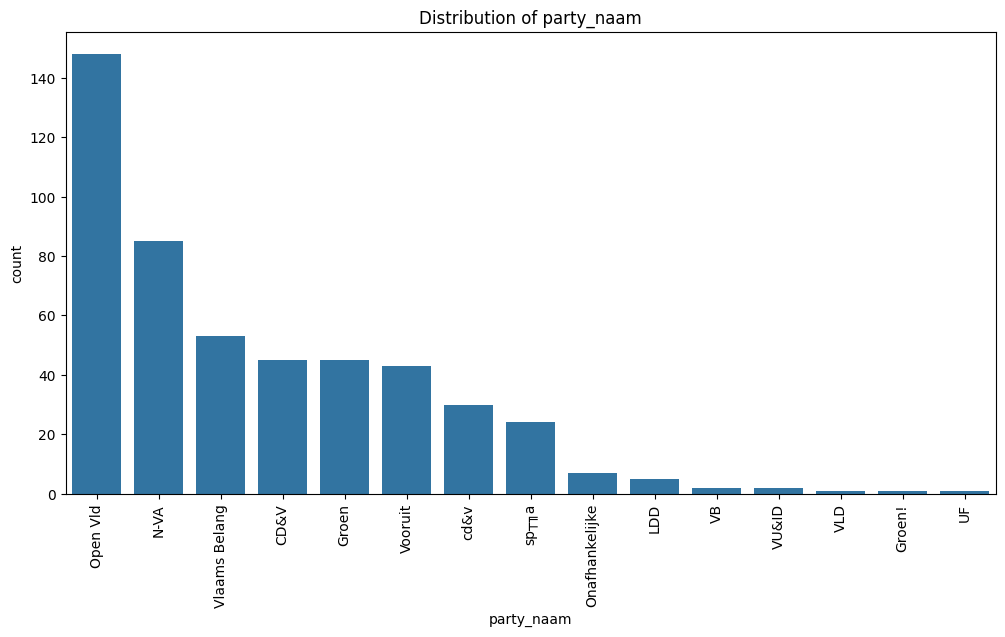

In [6]:
# distribution of political party
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='party_naam', order=df['party_naam'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of party_naam')
plt.show()

In [8]:
party_distribution = df['party_naam'].value_counts()
party_distribution

party_naam
Open Vld          148
N-VA               85
Vlaams Belang      53
CD&V               45
Groen              45
Vooruit            43
cd&v               30
sp┬╖a              24
Onafhankelijke      7
LDD                 5
VB                  2
VU&ID               2
VLD                 1
Groen!              1
UF                  1
Name: count, dtype: int64

Some of these parties no longer exist or had a name change. 
- VB = Vlaams Belang, 
- Groen! = Groen (name change)
- LDD = Lijst Dedecker 
- cd&V = CD&V
- sp.a = Vooruit (name change)
- UF = Union des Francophones

I will now create a column that indicates the position of the parties on the GAL/TAN dimension, using data from the Chapel Hill Expert Survey (2019).

In [3]:
CHES = pd.read_csv('1999-2019_CHES_dataset_means(v3).csv')
CHES.head(3)

,country,eastwest,eumember,year,expert,party_id,cmp_id,party,vote,seat,...,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,mip_one,mip_two,mip_three,chesversion
0,1,1,1,1999,9,115,NaN,FN,1.5,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.1
1,1,1,1,1999,9,109,21521.0,CVP,14.1,14.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.1
2,1,1,1,1999,9,107,21421.0,PVV/VLD,14.3,15.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.1


In [5]:
len(CHES)

1196

In [6]:
# country = 1 for Belgium
CHES = CHES[CHES['country'] == 1]
len(CHES)

72

In [14]:
# dropping all columns except for these 
keep = ['country', 'year','party_id', 'party', 'galtan']
CHES = CHES.drop(CHES.columns.difference(keep), axis=1)

In [15]:
CHES

,country,year,party_id,party,galtan
0,1,1999,115,FN,9.750000
1,1,1999,109,CVP,7.375000
2,1,1999,107,PVV/VLD,5.125000
3,1,1999,106,PRL,4.714286
4,1,1999,110,VU,4.000000
...,...,...,...,...,...
67,1,2019,104,ECOLO,1.083333
68,1,2019,102,PS,2.916667
69,1,2019,106,PRL/MR,3.181818
70,1,2019,109,CDV,6.250000


In [17]:
# checking the unique years
unique_years = CHES['year'].unique()
unique_years 

array([1999, 2002, 2006, 2010, 2014, 2019], dtype=int64)

In [21]:
grouped = CHES.groupby('year')['party'].unique()
for year, parties in grouped.items():
    print(f"Year {year}: {parties}")

Year 1999: ['FN' 'CVP' 'PVV/VLD' 'PRL' 'VU' 'FDF' 'SP' 'MCC' 'ID21' 'PSC' 'PS'
 'AGALEV' 'VB' 'ECOLO']
Year 2002: ['PS' 'CDH' 'CD&V' 'VLD' 'AGALEV' 'VB' 'SP' 'NVA' 'MR' 'ECOLO']
Year 2006: ['CD&V' 'MR' 'Groen' 'NVA' 'PS' 'CDH' 'VB' 'ECOLO' 'SPA' 'VLD']
Year 2010: ['VB' 'SPA' 'LDD' 'PVDA' 'VLD' 'CD&V' 'CDH' 'Groen' 'PS' 'NVA' 'Spirit'
 'ECOLO' 'MR' 'FN']
Year 2014: ['VB' 'NVA' 'PS' 'MR' 'FDF' 'SPA' 'ECOLO' 'PVDA' 'CD&V' 'Groen' 'CDH'
 'VLD' 'PP']
Year 2019: ['PVDA-PTB' 'VU/NVA' 'AGALEV' 'VB' 'VLD/PVV' 'SP/SPA' 'ECOLO' 'PS'
 'PRL/MR' 'CDV' 'PSC/CDH']


In [22]:
grouped = df.groupby('zittingsperiode')['party_naam'].unique()
for year, parties in grouped.items():
    print(f"Year {year}: {parties}")

Year 1995-1999: ['Vlaams Belang' 'VB']
Year 1999-2004: ['CD&V' 'VU&ID' 'Vlaams Belang' 'Open Vld' 'VLD' 'Groen!']
Year 2004-2009: ['sp┬╖a' 'cd&v' 'N-VA' 'Vlaams Belang' 'Open Vld' 'CD&V' 'Onafhankelijke']
Year 2009-2014: ['CD&V' 'N-VA' 'Open Vld' 'Vlaams Belang' 'sp┬╖a' 'cd&v' 'Onafhankelijke'
 'LDD' 'UF']
Year 2014-2019: ['CD&V' 'Open Vld' 'N-VA' 'sp┬╖a' 'cd&v' 'Vooruit' 'Vlaams Belang' 'Groen'
 'Onafhankelijke']
Year 2019-2024: ['cd&v' 'Open Vld' 'Vlaams Belang' 'Vooruit' 'N-VA' 'Groen'
 'Onafhankelijke']


In [28]:
# adding galtan values to df

def merge_ches_to_df(df, ches):

    merged_df = df.copy()
    
    # define mappings
    conditions_actions = {
        ('1995-1999', 'Vlaams Belang'): ('VB', 1999),
        ('1995-1999', 'VB'): ('VB', 1999),
        ('1999-2004', 'CD&V'): ('CD&V', 2002),
        ('1999-2004', 'VU&ID'): ('NVA', 2002),
        ('1999-2004', 'Open Vld'): ('VLD', 2002),
        ('1999-2004', 'VLD'): ('VLD', 2002),
        ('1999-2004', 'Groen!'): ('AGALEV', 2002),
        ('1999-2004', 'Vlaams Belang'): ('VB', 2002),
        ('2004-2009', 'sp┬╖a'): ('SPA', 2006),
        ('2004-2009', 'cd&v'): ('CD&V', 2006),
        ('2004-2009', 'CD&V'): ('CD&V', 2006),
        ('2004-2009', 'Open Vld'): ('VLD', 2006),
        ('2004-2009', 'N-VA'): ('NVA', 2006),
        ('2004-2009', 'Vlaams Belang'): ('VB', 2006),
        ('2009-2014', 'CD&V'): ('CD&V', 2010),
        ('2009-2014', 'cd&v'): ('CD&V', 2010),
        ('2009-2014', 'N-VA'): ('NVA', 2010),
        ('2009-2014', 'Open Vld'): ('VLD', 2010),
        ('2009-2014', 'Vlaams Belang'): ('VB', 2010),
        ('2009-2014', 'sp┬╖a'): ('SPA', 2010),
        ('2009-2014', 'LDD'): ('LDD', 2010),
        ('2009-2014', 'UF'): ('FDF', 2014),
        ('2014-2019', 'CD&V'): ('CD&V', 2014),
        ('2014-2019', 'cd&v'): ('CD&V', 2014),
        ('2014-2019', 'N-VA'): ('NVA', 2014),
        ('2014-2019', 'Open Vld'): ('VLD', 2014),
        ('2014-2019', 'Vlaams Belang'): ('VB', 2014),
        ('2014-2019', 'sp┬╖a'): ('SPA', 2014),
        ('2014-2019', 'Vooruit'): ('SPA', 2014),
        ('2014-2019', 'Groen'): ('Groen', 2014),
        ('2019-2024', 'cd&v'): ('CDV', 2019),
        ('2019-2024', 'N-VA'): ('VU/NVA', 2019),
        ('2019-2024', 'Open Vld'): ('VLD/PVV', 2019),
        ('2019-2024', 'Vlaams Belang'): ('VB', 2019),
        ('2019-2024', 'Vooruit'): ('SP/SPA', 2019),
        ('2019-2024', 'Groen'): ('AGALEV', 2019),

    }
    
    for index, row in df.iterrows():
        key = (row['zittingsperiode'], row['party_naam'])
        if key in conditions_actions:
            party_ches, year_ches = conditions_actions[key]
            # Find corresponding galtan value from CHES
            galtan_value = ches.loc[(ches['party'] == party_ches) & (ches['year'] == year_ches), 'galtan'].iloc[0]
            merged_df.at[index, 'galtan'] = galtan_value
    
    return merged_df


In [29]:
merged_df = merge_ches_to_df(df, CHES)
print(merged_df)

     id_fact zittingsjaar naam_vragensteller voornaam_vragensteller  \
0     449734      BZ 1995           Dewinter                  Filip   
1     452087    1996-1997  Van Nieuwenhuysen                    Luk   
2     451535    1995-1996  Van Nieuwenhuysen                    Luk   
3     451240    1995-1996             Dillen                Marijke   
4     450798    1995-1996           Dewinter                  Filip   
..       ...          ...                ...                    ...   
487  1714426    2022-2023            Sminate                  Nadia   
488  1711732    2022-2023              Saeys                  Freya   
489  1774502    2023-2024           Perdaens                  Freya   
490  1771914    2023-2024               Ampe                    Els   
491  1762780    2022-2023         Groothedde                  Celia   

     id_vragensteller bevraagde_minister_naam bevraagde_minister_voornaam  \
0                1803         Van den Bossche                         

Let's check if there are any missing values for the GALTAN score. Normally, there should only be missing values for the party Onafhankelijke.

In [30]:
missing_galtan = merged_df['galtan'].isna()
num_missing = missing_galtan.sum()
print(f'Number of missing values in galtan: {num_missing}')

# Get the 'party_naam' values for rows where 'galtan' is missing
missing_party_naam = merged_df.loc[missing_galtan, 'party_naam']
print('Party_naam values for rows with missing galtan:')
print(missing_party_naam)

Number of missing values in galtan: 7
Party_naam values for rows with missing galtan:
78     Onafhankelijke
79     Onafhankelijke
83     Onafhankelijke
128    Onafhankelijke
314    Onafhankelijke
315    Onafhankelijke
490    Onafhankelijke
Name: party_naam, dtype: object


Indeed, there are 7 instances with a missing GALTAN score, all of them are from the party Onafhankelijke, because this party was missing in the CHES dataset.

I will now impute their missing value with the overall mean, because the amount of instances per term are not equally large enough for all terms to impute with a mean calculated per term, the GALTAN score for Onafhankelijke will then fluctuate too much. 

In [34]:
# compute mean GALTAN score
mean_galtan = merged_df['galtan'].mean()
mean_galtan

4.556423584790574

In [35]:
# impute missing GALTAN values for Onafhankelijke with the overall mean
merged_df['galtan'].fillna(mean_galtan, inplace=True)

In [36]:
# check if there are any remaining missing GALTAN values 
merged_df['galtan'].isna().sum()

0

No missing values for the 'galtan' variable anymore. Now, each party has a galtan score.

In [38]:
merged_df.head(3)

,id_fact,zittingsjaar,naam_vragensteller,voornaam_vragensteller,id_vragensteller,bevraagde_minister_naam,bevraagde_minister_voornaam,bevraagde_minister_id,publicatiedatum,text,...,party_id,party_naam,zittingsperiode,antwoord_count,Antwoord_ANTWOORD_count,check,split_location,question,answer,galtan
0,449734,BZ 1995,Dewinter,Filip,1803,Van den Bossche,Luc,1890,1995-10-11,Vraag nr. 22 van 4 september 1995 van de heer ...,...,1279900,Vlaams Belang,1995-1999,1,1,1,Antwoord,Vraag nr. 22 van 4 september 1995 van de heer ...,Antwoord De in de vraag aangehaalde problemati...,9.75
1,452087,1996-1997,Van Nieuwenhuysen,Luk,1907,Van Rompuy,Eric,1912,1996-12-12,Vraag nr. 30 Indien besloten wordt een bepaald...,...,1491028,Vlaams Belang,1995-1999,0,0,0,Antwoord,Vraag nr. 30 Indien besloten wordt een bepaald...,Antwoord pen werd op 28 en 29 september 1996 e...,9.75
2,451535,1995-1996,Van Nieuwenhuysen,Luk,1907,Van Asbroeck,Anne,1886,1996-10-08,Vraag nr. 42 aan de balies van de Vlaamse Geme...,...,1491028,Vlaams Belang,1995-1999,1,1,1,Antwoord,Vraag nr. 42 aan de balies van de Vlaamse Geme...,Antwoord Gelijke-kansenbeleid Brusselse Aangel...,9.75


Let's now check out the GALTAN distribution.

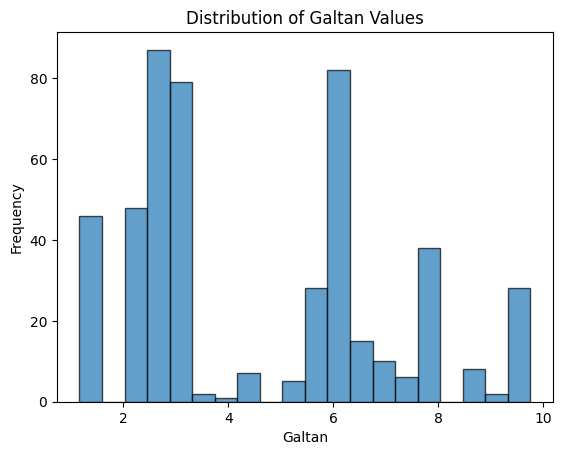

In [39]:
# distribution of galtan values
plt.hist(merged_df['galtan'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Galtan')
plt.ylabel('Frequency')
plt.title('Distribution of Galtan Values')
plt.show()


In [41]:
# let's check the bin edges for 3 bins based on equal frequency
_, bin_edges = pd.qcut(merged_df['galtan'], q=3, retbins=True, labels=False)
bin_edges

array([1.16666663, 2.71      , 6.090909  , 9.75      ])

In [42]:
# let's check for bins with equal width
num_bins = 3
merged_df['galtan_equal_width_bins'] = pd.cut(merged_df['galtan'], bins=num_bins)

# check the frequency of instances in each bin
frequency_table = merged_df['galtan_equal_width_bins'].value_counts().sort_index()
frequency_table

galtan_equal_width_bins
(1.158, 4.028]    263
(4.028, 6.889]    137
(6.889, 9.75]      92
Name: count, dtype: int64

In [44]:
num_bins = 3
custom_labels = ['GAL', 'center', 'TAN']

# equal width bins for galtan values
merged_df['galtan_equal_width_bins'] = pd.cut(merged_df['galtan'], bins=num_bins, labels=custom_labels)

# frequency of instances in each bin
frequency_table = merged_df['galtan_equal_width_bins'].value_counts().sort_index()
frequency_table

galtan_equal_width_bins
GAL       263
center    137
TAN        92
Name: count, dtype: int64

In [45]:
file_path = 'df_final.csv'
merged_df.to_csv(file_path, index=False)